In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('poke')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '%03d.png' % img_i

        # and get the url with that string appended the end
        url = 'https://assets.pokemon.com/assets/cms2/img/pokedex/detail/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('poke', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'poke' folder in your directory")

You may need to delete the existing 'poke' folder in your directory


In [55]:
files = os.listdir('poke')# img.<tab>

#print(os.path.join('poke', files[0]))
a=plt.imread(os.path.join('poke', files[0]))
#plt.imshow(a)

files = [os.path.join('poke', file_i)
 for file_i in os.listdir('poke')
 if '.png' in file_i]

im = plt.imread(files[24])
#plt.imshow(img)

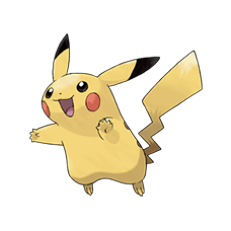

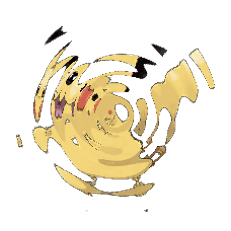

In [57]:
import numpy.matlib
from skimage import img_as_float
from skimage import io
plt.style.use('ggplot')

file_name2=plt.imread(files[24])
#img=io.imread(file_name2)
img = img_as_float(file_name2)

row, col, channel = img.shape
img_out = img * 1.0
A = 7.0
B = 3.0

center_x = (col-1)/2.0
center_y = (row-1)/2.0

xx = np.arange (col) 
yy = np.arange (row)

x_mask = numpy.matlib.repmat (xx, row, 1)
y_mask = numpy.matlib.repmat (yy, col, 1)
y_mask = np.transpose(y_mask)

xx_dif = x_mask - center_x
yy_dif = center_y - y_mask

theta = np.arctan2(yy_dif,  xx_dif)
r = np.sqrt(xx_dif * xx_dif + yy_dif * yy_dif)
r1 = r + A*col*0.01*np.sin(B*0.1*r)

x_new = r1 * np.cos(theta) + center_x
y_new = center_y - r1 * np.sin(theta) 

int_x = np.floor (x_new)
int_x = int_x.astype(int)
int_y = np.floor (y_new)
int_y = int_y.astype(int)

for ii in range(row):
    for jj in range (col):
        new_xx = int_x [ii, jj]
        new_yy = int_y [ii, jj]

        if x_new [ii, jj] < 0 or x_new [ii, jj] > col -1 :
            continue
        if y_new [ii, jj] < 0 or y_new [ii, jj] > row -1 :
            continue

        img_out[ii, jj, :] = img[new_yy, new_xx, :]

plt.figure (1)
plt.imshow (img)
plt.axis('off')

plt.figure (2)
plt.imshow (img_out)
plt.axis('off')

plt.show()